In [1]:
# Install Libraries here

!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.7 MB/s eta 0:00:00


In [2]:
# Importing Required libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from pmdarima.arima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from scipy import stats
import matplotlib.dates as mdates
from keras.models import Sequential
import datetime
from statsmodels.tsa.stattools import adfuller
from keras.layers import LSTM, Dense
from sklearn.model_selection import GridSearchCV
import warnings
import matplotlib.dates as mdates
warnings.filterwarnings('ignore')
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# Loading the data

from google.colab import files

uploaded = files.upload()


Saving energydata_complete.csv to energydata_complete.csv


In [4]:
df = pd.read_csv('energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### Attribute Information:

#### Attribute	Description	Units

Date	time	year-month-day hour:minute:second

Appliances	energy use	in Wh

lights	energy use of light fixtures in the house	in Wh

T1	Temperature in kitchen area	in Celsius

RH_1	Humidity in kitchen area	in %

T2	Temperature in living room area	in Celsius

RH_2	Humidity in living room area	in %

T3	Temperature in laundry room area

RH_3	Humidity in laundry room area	in %

T4	Temperature in office room	in Celsius

RH_4	Humidity in office room	in %

T5	Temperature in bathroom	in Celsius

RH_5	Humidity in bathroom	in %

T6	Temperature outside the building (north side)	in Celsius

RH_6	Humidity outside the building (north side)	in %

T7	Temperature in ironing room	in Celsius

RH_7	Humidity in ironing room	in %

T8	Temperature in teenager room 2	in Celsius

RH_8	Humidity in teenager room 2	in %

T9	Temperature in parents room	in Celsius

RH_9	Humidity in parents room	in %

To	Temperature outside (from Chievres weather station)	in Celsius

Pressure	(from Chievres weather station)	in mm Hg

RH_out	Humidity outside (from Chievres weather station)	in %

Wind speed	(from Chievres weather station)	in m/s

Visibility	(from Chievres weather station)	in km

Tdewpoint	(from Chievres weather station)	Â °C

rv1	Random variable 1	nondimensional

rv2	Random variable 2	nondimensional

In [5]:
print("shape of the data: ", df.shape)

print("Data types info: ", df.dtypes)

shape of the data:  (19735, 29)
Data types info:  date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object


### Exploratory Data Analysis

In [6]:
# Check for duplicates
print(df.duplicated().sum())

0


In [7]:
df.isnull().sum() #checking null values

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [8]:
df.describe() # Statistical summary

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


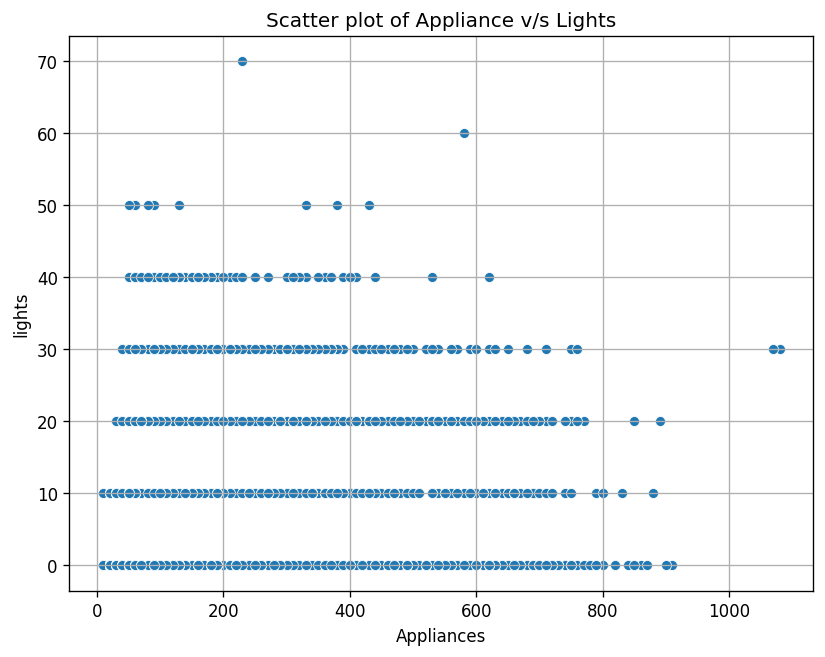

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Appliances", y="lights", data=df)
plt.xlabel("Appliances")
plt.ylabel("lights")
plt.grid(True)
plt.title("Scatter plot of Appliance v/s Lights")
plt.show()


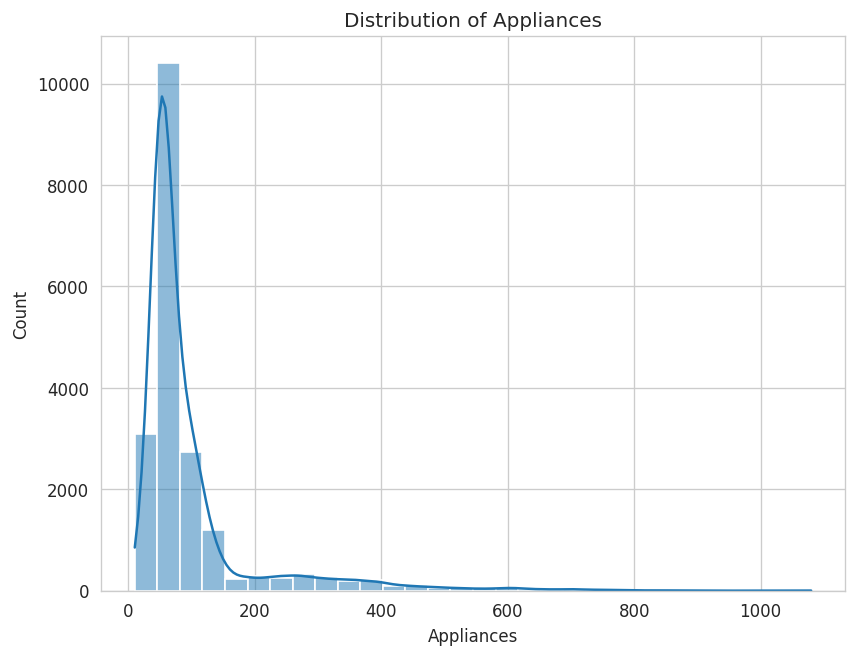

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(df["Appliances"], bins=30, kde=True)
plt.xlabel("Appliances")
plt.title("Distribution of Appliances")
plt.show()


In [11]:
df['date'] = pd.to_datetime(df['date'])  # Convert the 'Date' column to datetime

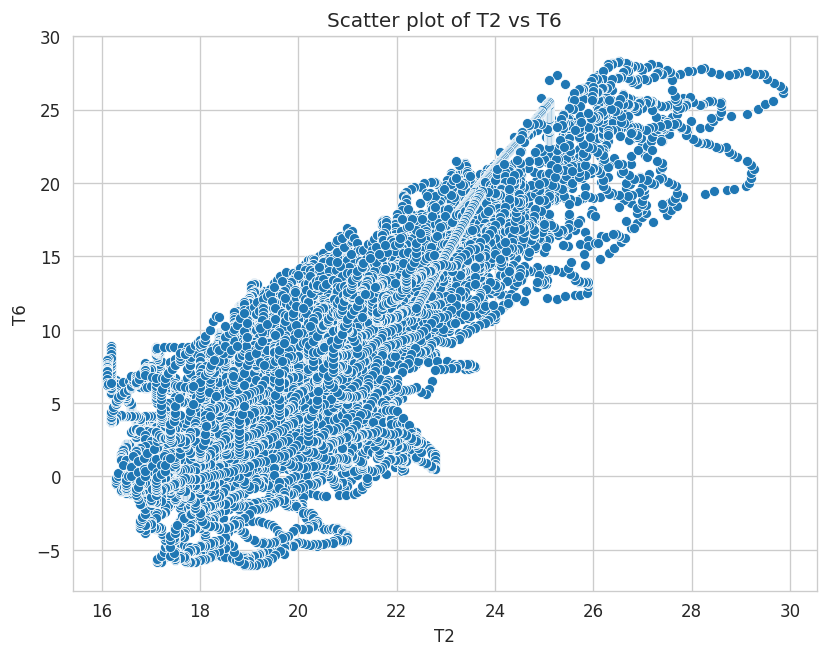

In [12]:
# Scatter plot of T2 vs T6
plt.figure(figsize=(8, 6))
sns.scatterplot(x="T2", y="T6", data=df)
plt.xlabel("T2")
plt.ylabel("T6")
plt.title("Scatter plot of T2 vs T6")
plt.show()

In [13]:
correlation_matrix = df.corr()

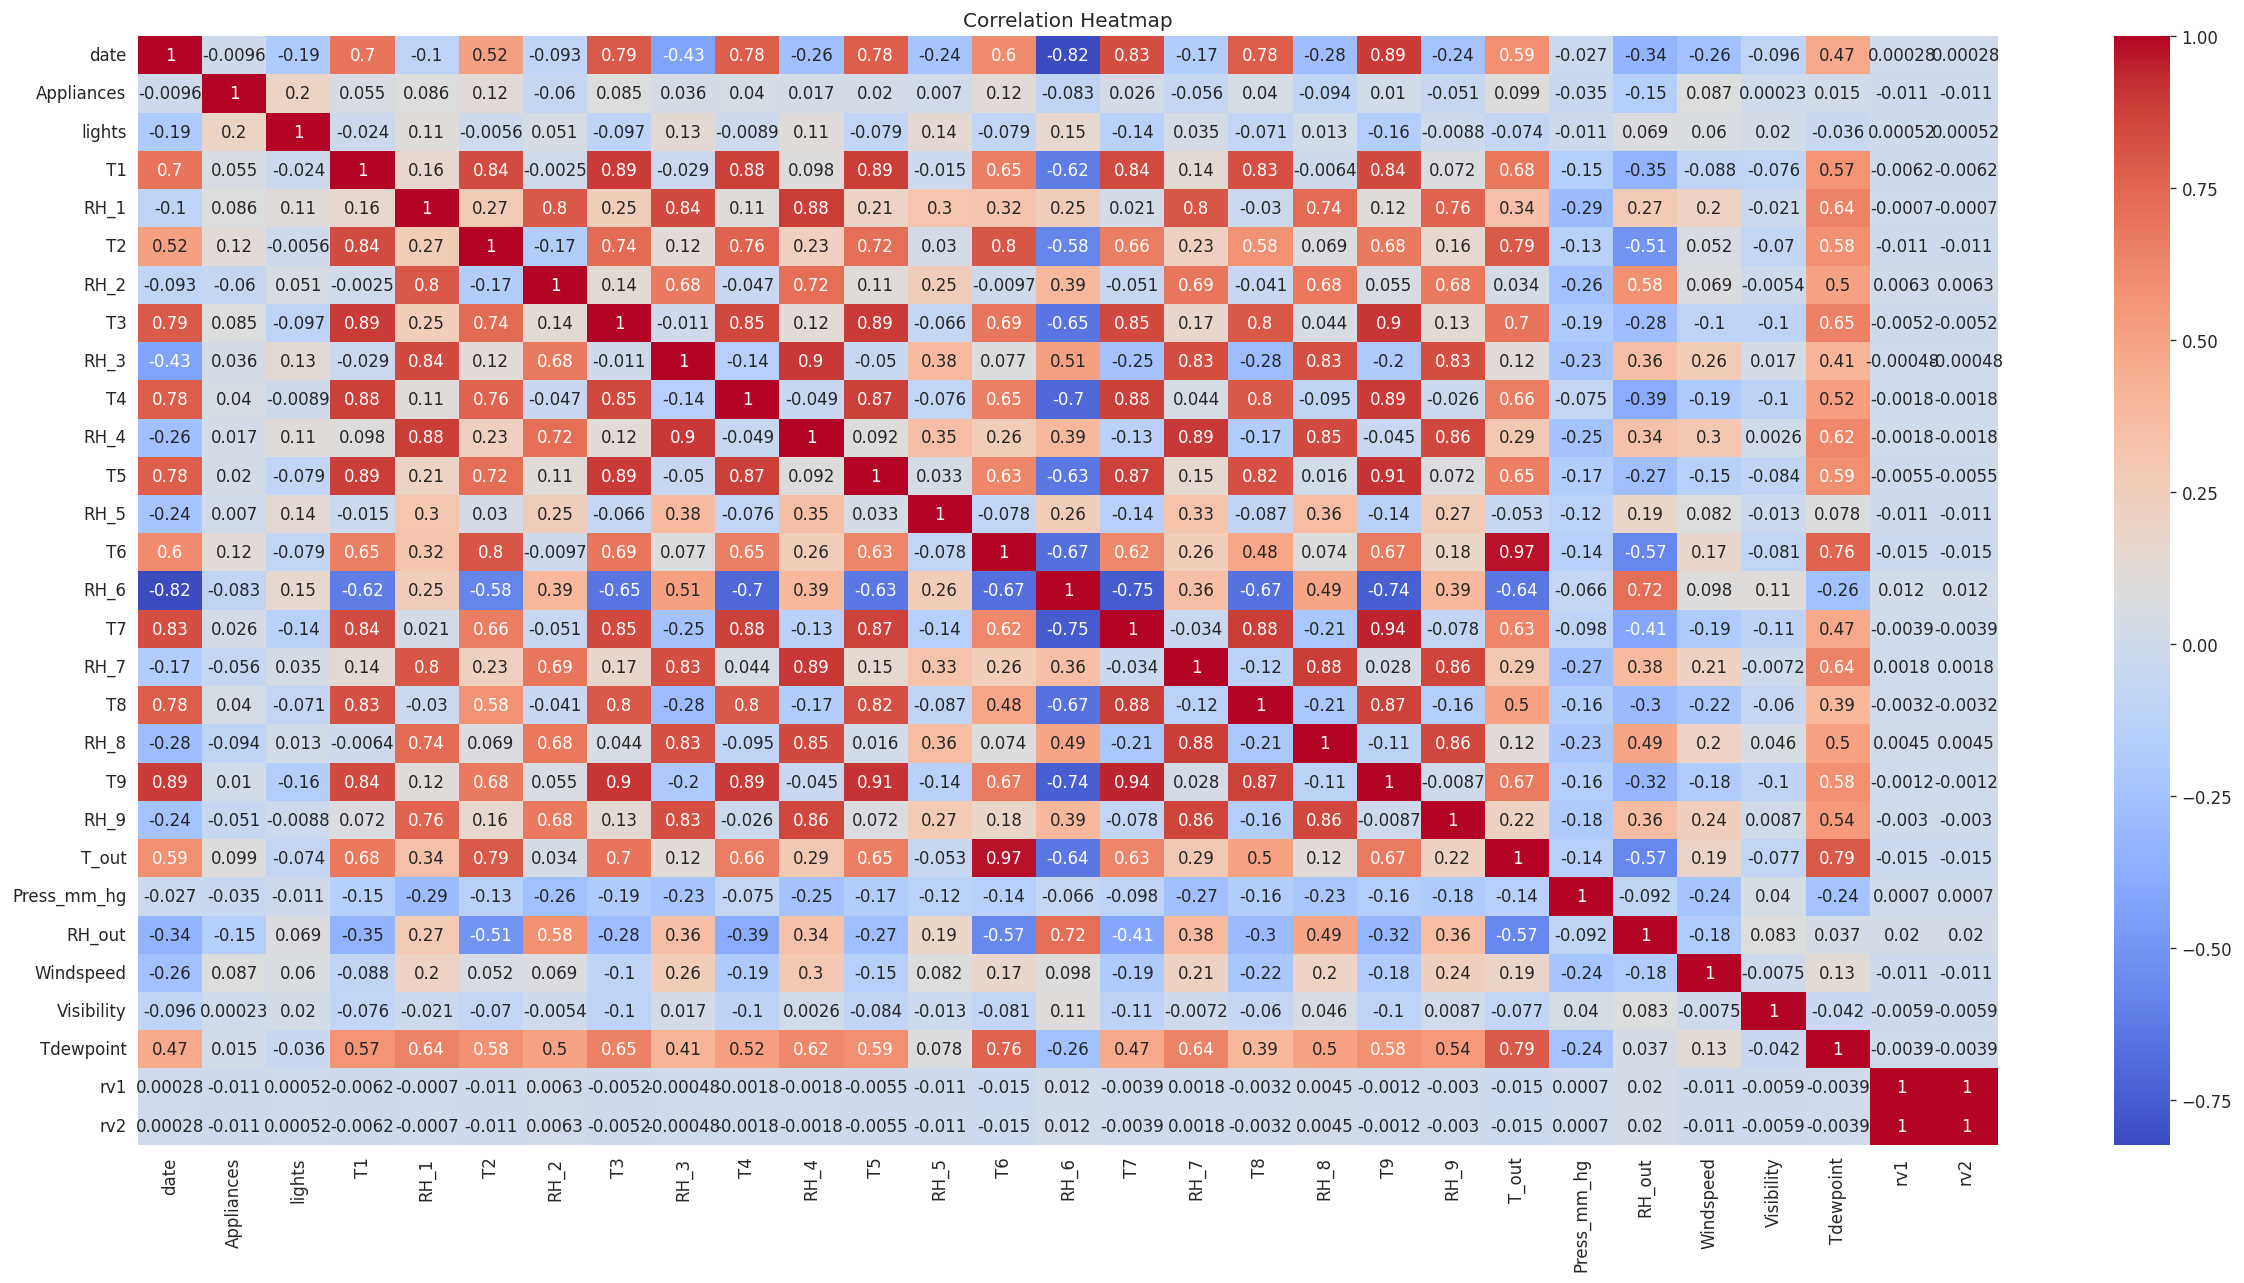

In [14]:
plt.figure(figsize = (25, 12))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title("Correlation Heatmap")
plt.show()


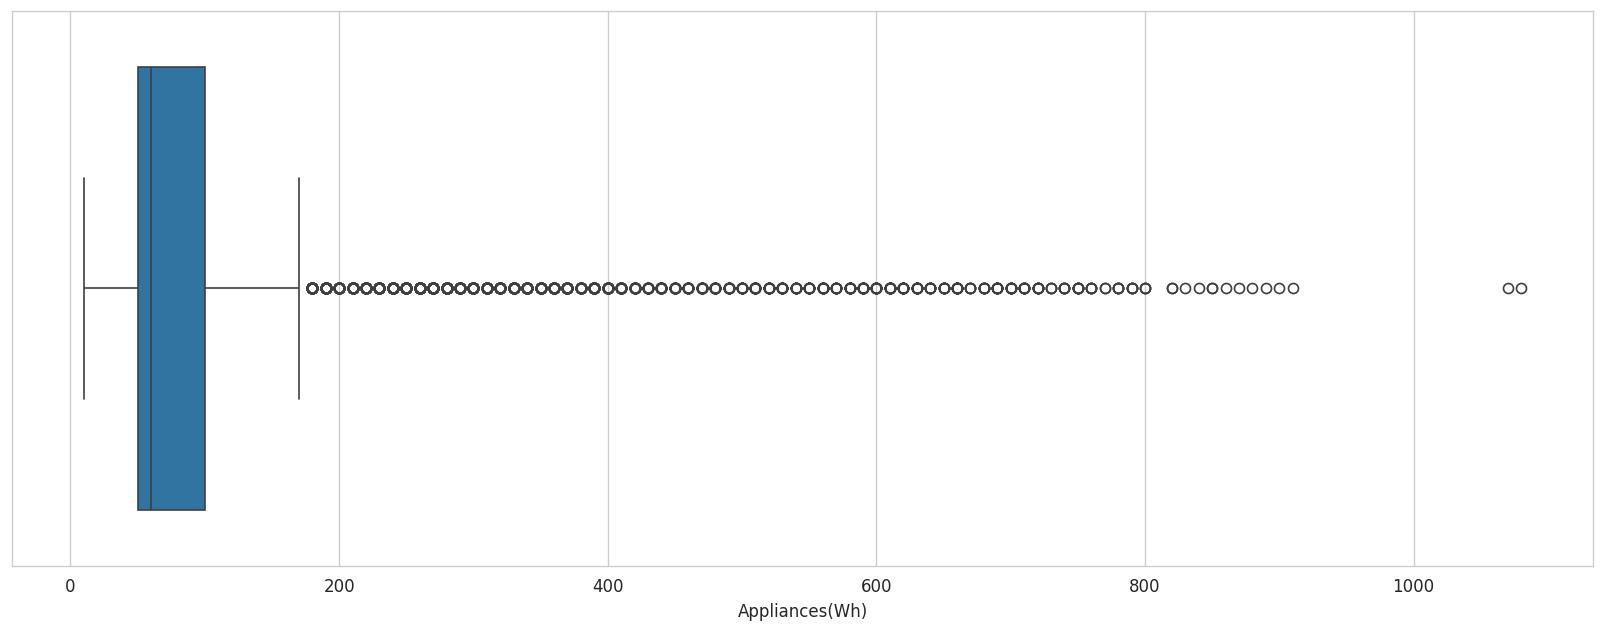

In [15]:
plt.figure(figsize=(17, 6))
sns.boxplot(x=df['Appliances'], orient='h')
plt.xlabel("Appliances(Wh)")
plt.show()


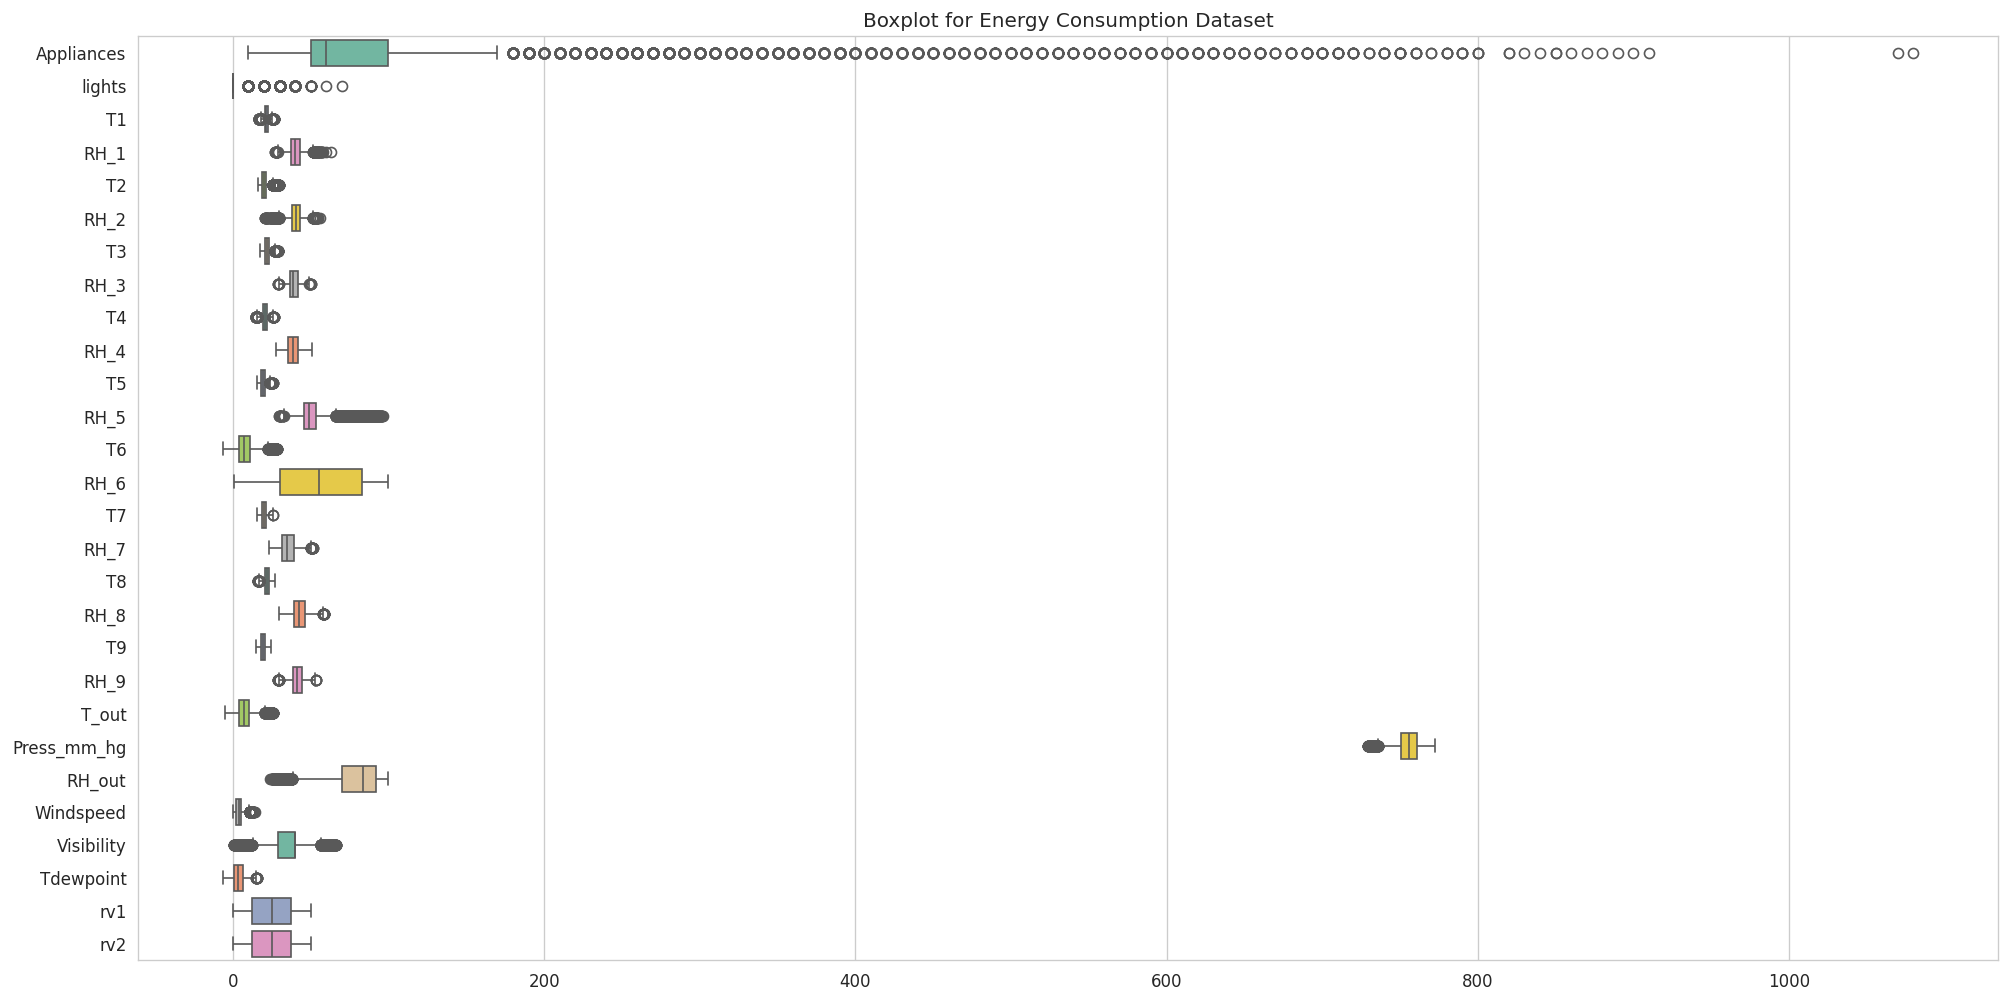

In [16]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Boxplot for Energy Consumption Dataset")
plt.show()


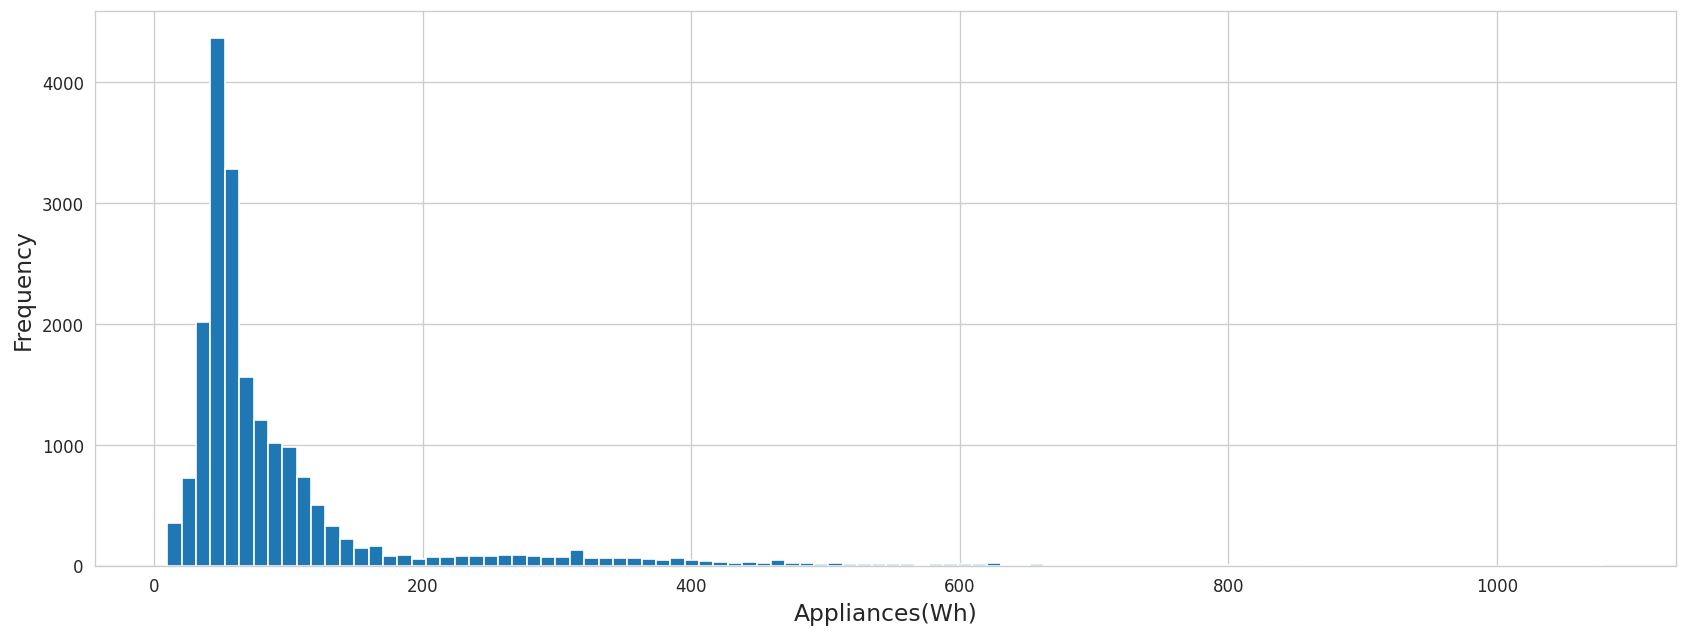

In [17]:
plt.figure(figsize=(17, 6))
plt.hist(df['Appliances'], bins = 100)
plt.xlabel("Appliances(Wh)", fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
plt.show()

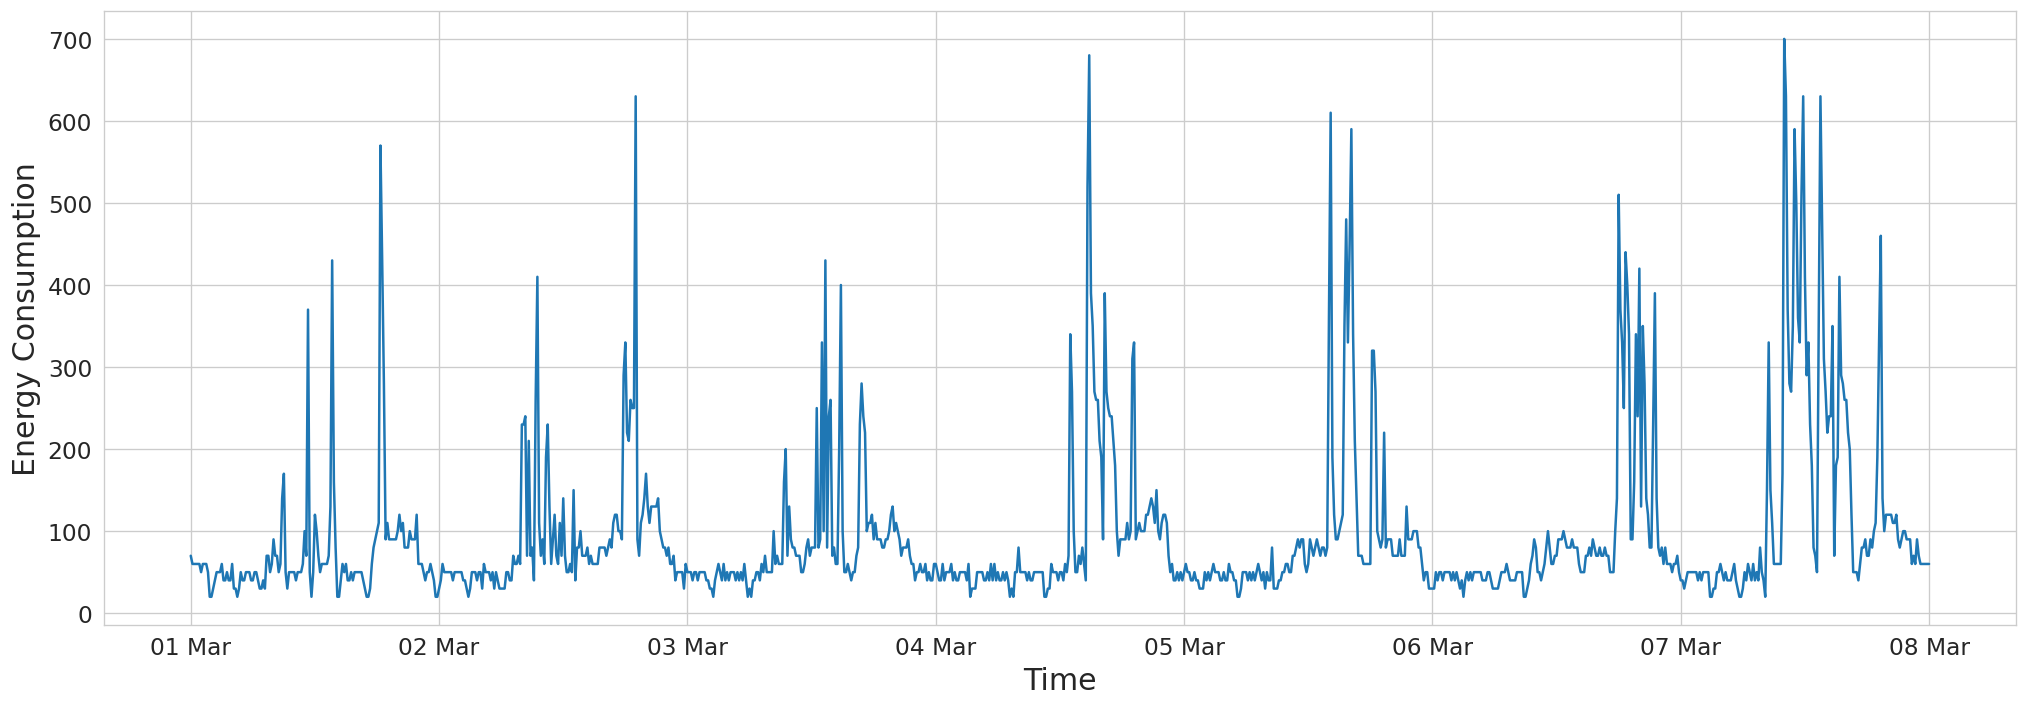

In [18]:
start_date = '2016-03-01'
end_date = '2016-03-08'

filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

plt.figure(figsize=(17, 6))
plt.plot(filtered_df['date'], filtered_df['Appliances'], label='Appliances')
plt.xlabel('Time', fontsize = 18)
plt.ylabel('Energy Consumption', fontsize = 18)
plt.grid(True)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.tight_layout()

plt.show()

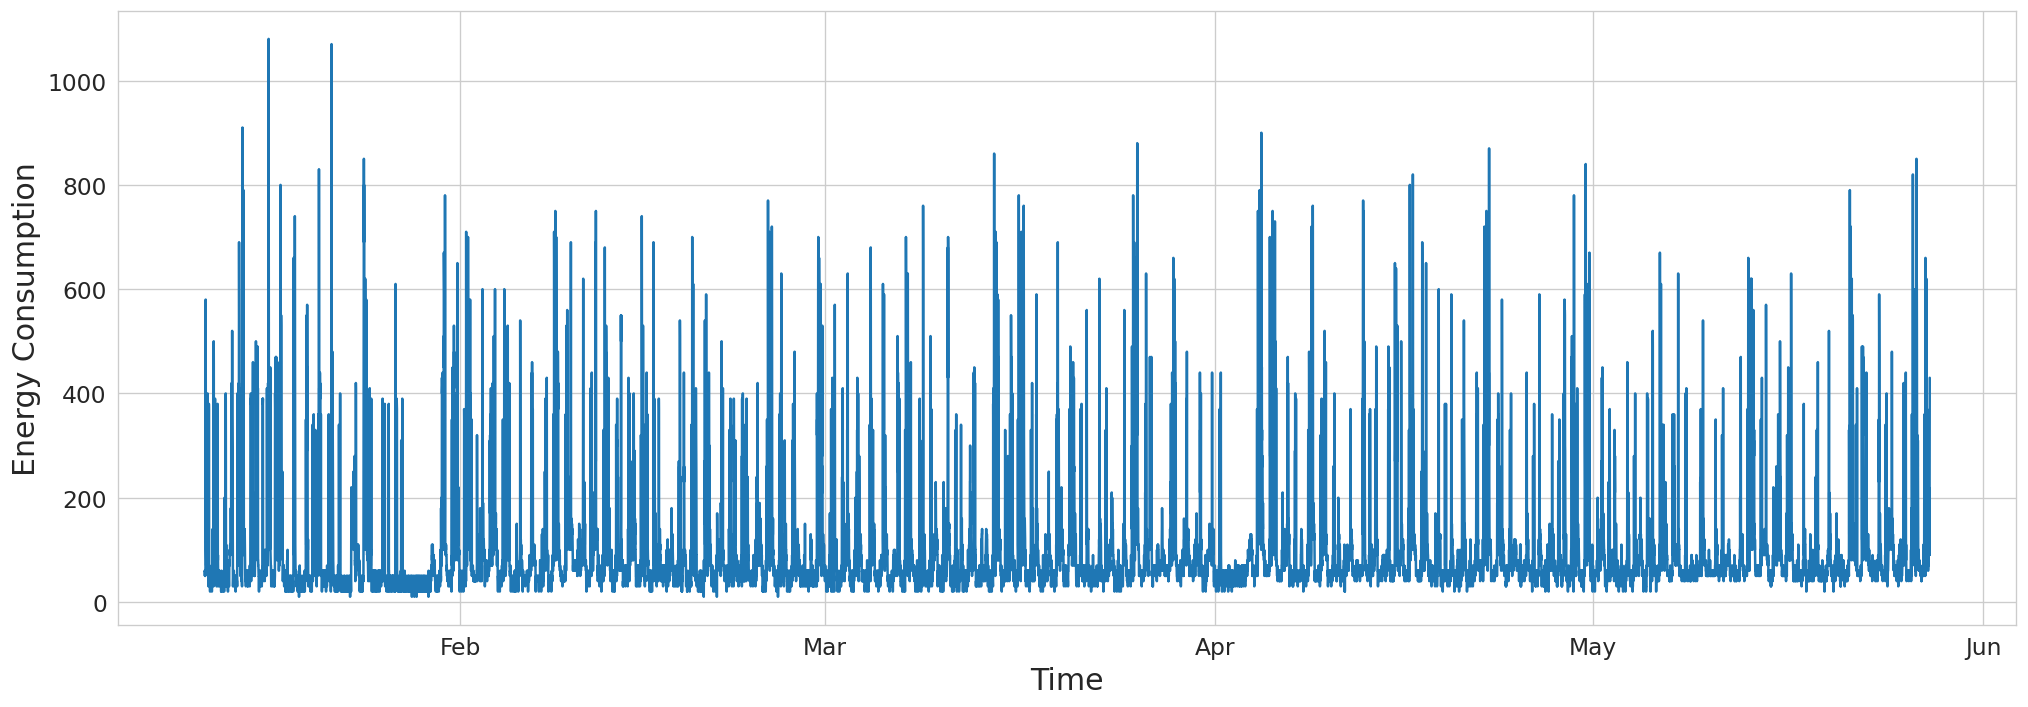

In [19]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

plt.figure(figsize=(17, 6))
plt.plot(df['date'], df['Appliances'], label='Appliance')
plt.xlabel('Time', fontsize = 18)
plt.ylabel('Energy Consumption', fontsize = 18)
plt.grid(True)

unique_months = df['date'].dt.month

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.yticks(fontsize = 14)
plt.xticks( fontsize = 14)
plt.tight_layout()

plt.show()


In [20]:
# def identify_outliers(data):
#     q1 = np.percentile(data, 25)
#     q3 = np.percentile(data, 75)

#     iqr = q3 - q1

#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr

#     outliers = (data < lower_bound) | (data > upper_bound)

#     return outliers

# def treat_outliers_linear_interpolation(data):
#     outliers = identify_outliers(data)


#     treated_data = data.astype(float)
#     treated_data[outliers] = np.nan


#     treated_data = pd.Series(treated_data).interpolate()

#     return treated_data


In [21]:
# data = df['Appliances']
# print("Original data:", data)

# outliers = identify_outliers(data)
# print("Outliers:", outliers)

In [22]:
# # Treat outliers using linear interpolation
# treated_data = treat_outliers_linear_interpolation(data)
# print("Data after treating outliers with linear interpolation:", treated_data)

In [23]:
# df['Appliances2'] = treated_data

In [24]:
# Treating outliers

q1 = df['Appliances'].quantile(0.25)
q3 = df['Appliances'].quantile(0.75)
IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

df = df[(df.Appliances >=lower_bound) & (df.Appliances <= upper_bound)]

In [25]:
df['Appliances2'] = df['Appliances']

In [26]:
df.shape

(17597, 30)

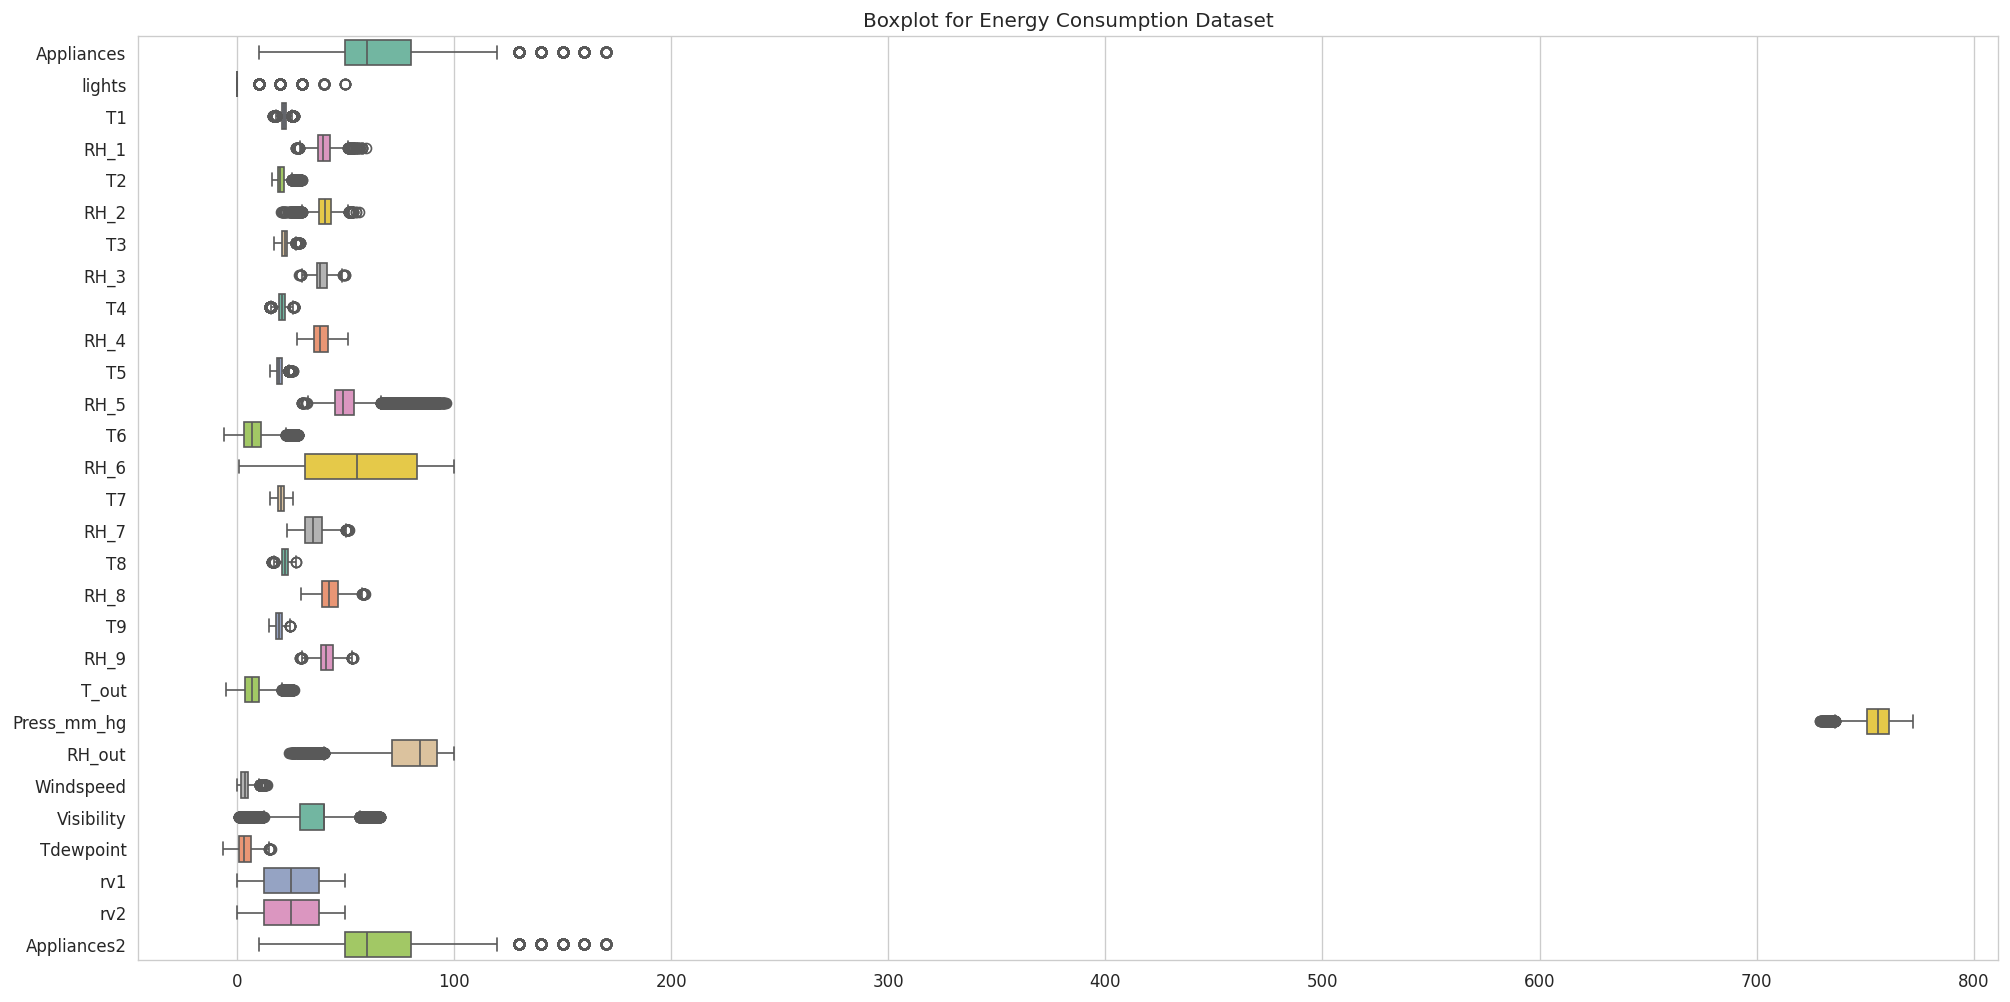

In [27]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Boxplot for Energy Consumption Dataset")
plt.show()


Outliers replaced using Linear interpolation

In [28]:
# Make copy of the dataset
df2 = df.copy()

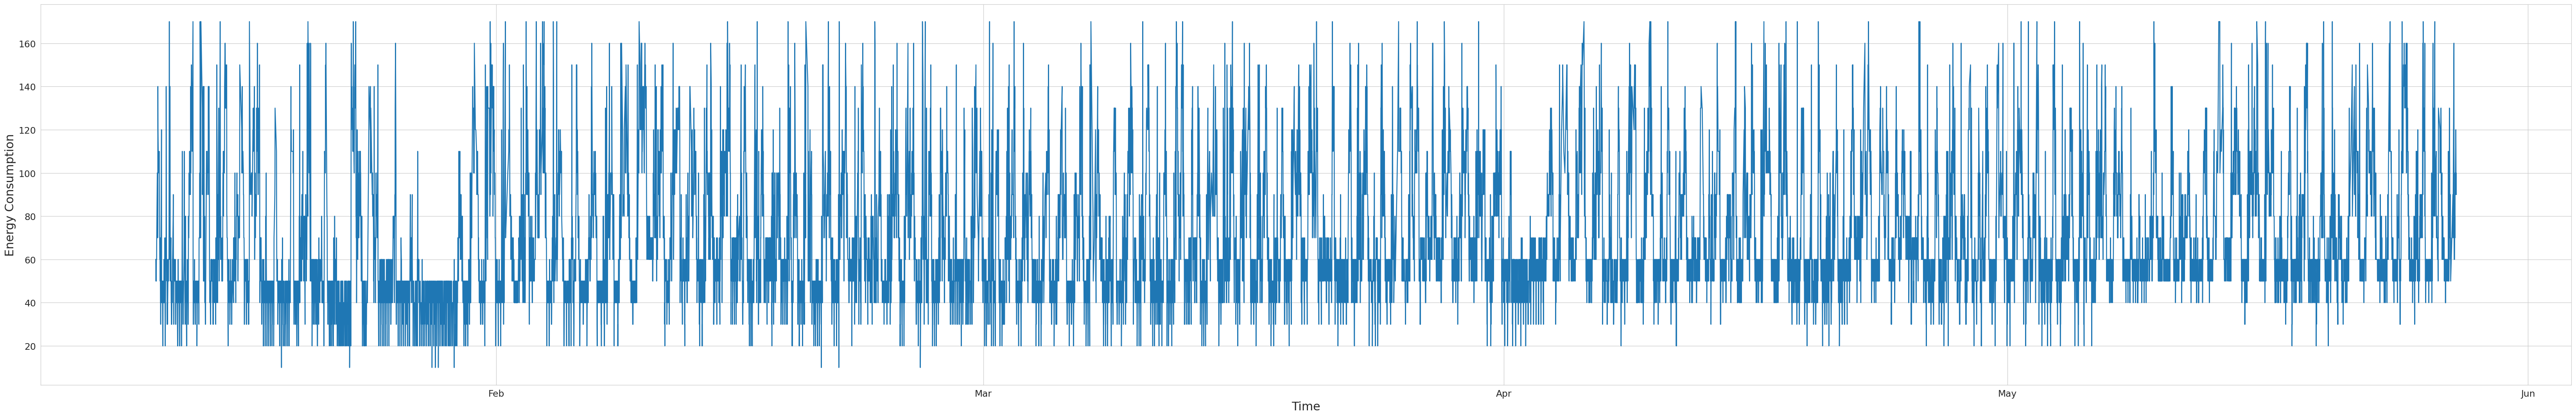

In [29]:
plt.figure(figsize=(55, 9))
plt.plot(df['date'], df['Appliances2'], label='Appliance2')
plt.xlabel('Time', fontsize = 18)
plt.ylabel('Energy Consumption', fontsize = 18)

unique_months = df['date'].dt.month

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.yticks(fontsize = 14)
plt.xticks( fontsize = 14)
plt.tight_layout()

plt.show()

In [30]:
df2 = df[['date', 'Appliances2']]

In [31]:
train= df2[df2['date'] <= pd.to_datetime('2016-04-30')]
test= df2[df2['date'] > pd.to_datetime('2016-04-30')]

In [32]:
df2 = df2.set_index('date')


In [33]:
results = adfuller(df2)

In [34]:
adf_statistics = results[0]
p_value = results[1]
critical_value = results[4]

print("ADF Statistics:",adf_statistics)
print("P value: ",p_value)
print("critical_value:",critical_value)

print()

if p_value <= 0.05:
  print("Reject the null Hypothesis and concluded that data is Stationary")

else:
  print("Fail to Reject the null Hypothesis and concluded that data is Non - Stationary")

ADF Statistics: -20.924280790467826
P value:  0.0
critical_value: {'1%': -3.43072209166838, '5%': -2.8617044501913056, '10%': -2.566857532560227}

Reject the null Hypothesis and concluded that data is Stationary


In [35]:
decompose_result=seasonal_decompose(x=df2["Appliances2"].iloc[-1000:].values,period=24)

<Figure size 4440x2400 with 0 Axes>

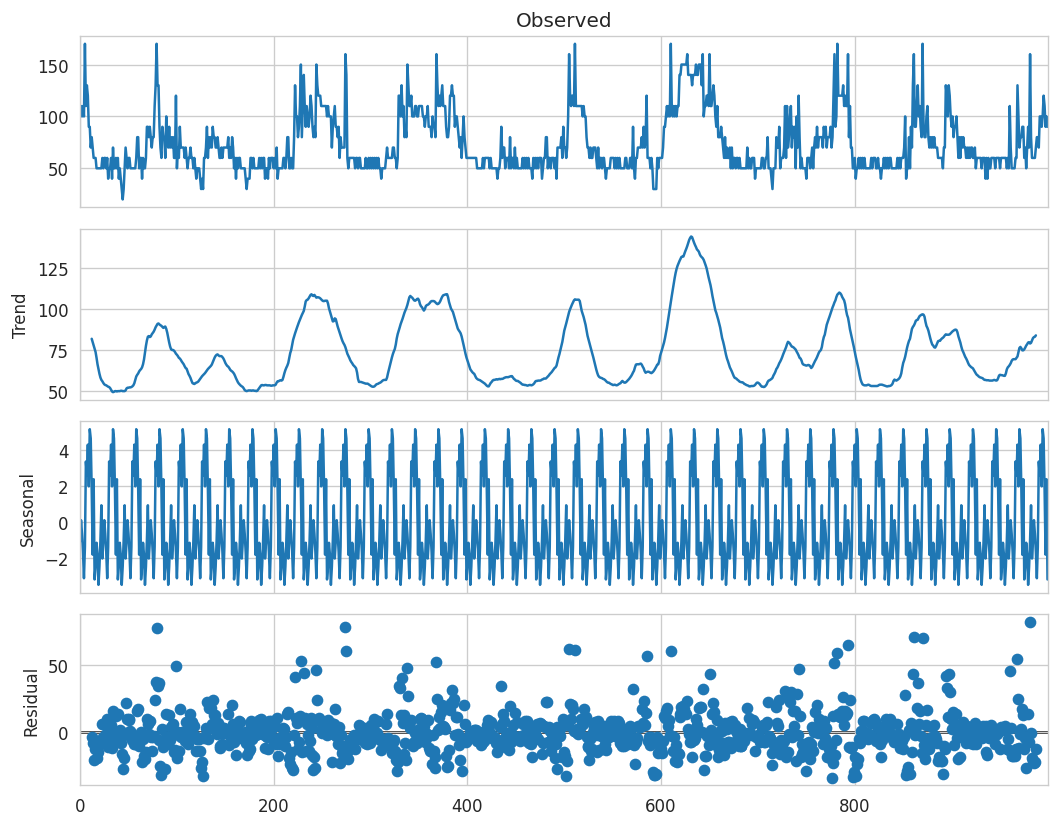

In [36]:
plt.figure(figsize=(37,20))
decompose_result.plot()
plt.show()

In [37]:
train.set_index('date', inplace = True)

In [38]:
test.set_index('date', inplace = True)

In [39]:
order = (1,0,1)
model = ARIMA(train, order=order)
fitted_model = model.fit()

forecast = fitted_model.forecast(steps=len(test))



In [40]:
test1 = test.values.flatten()

In [41]:
forecast.values.reshape(-1,1)

array([[53.73451319],
       [54.76704471],
       [55.7133613 ],
       ...,
       [66.10036844],
       [66.10036844],
       [66.10036844]])

In [42]:

# residuals = test1 - forecast

# stderr = np.std(residuals)

# conf_int = []
# for i in range(len(test)):
#     lower_bound = forecast[i] - 1.96 * stderr
#     upper_bound = forecast[i] + 1.96 * stderr
#     conf_int.append((lower_bound, upper_bound))

# print("Standard Error:", stderr)

# print("Confidence Intervals:")
# print(conf_int)

In [43]:
# lower_values = [item[0] for item in conf_int]
# upper_values = [item[1] for item in conf_int]


In [44]:
# lower_series = pd.Series(lower_values, index=test.index)
# upper_series = pd.Series(upper_values, index=test.index)

In [45]:
# plt.figure(figsize=(10,5), dpi=100)
# plt.plot(train, label='training data')
# plt.plot(test, color = 'blue', label='Actual')
# plt.plot(forecast, color = 'orange',label='Energy Forecast')
# plt.fill_between(lower_series.index, lower_series, upper_series,
#                  color='k', alpha=.10)
# plt.title('Forecasting of Energy using ARIMA')
# plt.xlabel('Time')
# plt.ylabel('Energy Usage')
# plt.legend(loc='upper left', fontsize=8)
# plt.show()

In [46]:
# # Calculate evaluation metrics

# mse = mean_squared_error(test, forecast)
# rmse = np.sqrt(mse)
# mae = mean_absolute_error(test, forecast)
# r_squared = r2_score(test, forecast)

# print("Mean Squared Error (MSE):", mse)
# print("Root Mean Squared Error (RMSE):", rmse)
# print("Mean Absolute Error (MAE):", mae)
# print("R-squared:", r_squared)

In [47]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=2eae4f45804dd85595b6c2be63e08a256bcca674b5a97c0e117f27382214da73
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [48]:
from eli5.sklearn import PermutationImportance


In [49]:
df3 = df.copy()

In [50]:
df3 = df3.set_index('date')

In [51]:
df3.drop('Appliances', inplace = True ,axis = 1)

In [52]:
correlation_matrix = df3.corr()
app_score = correlation_matrix['Appliances2']

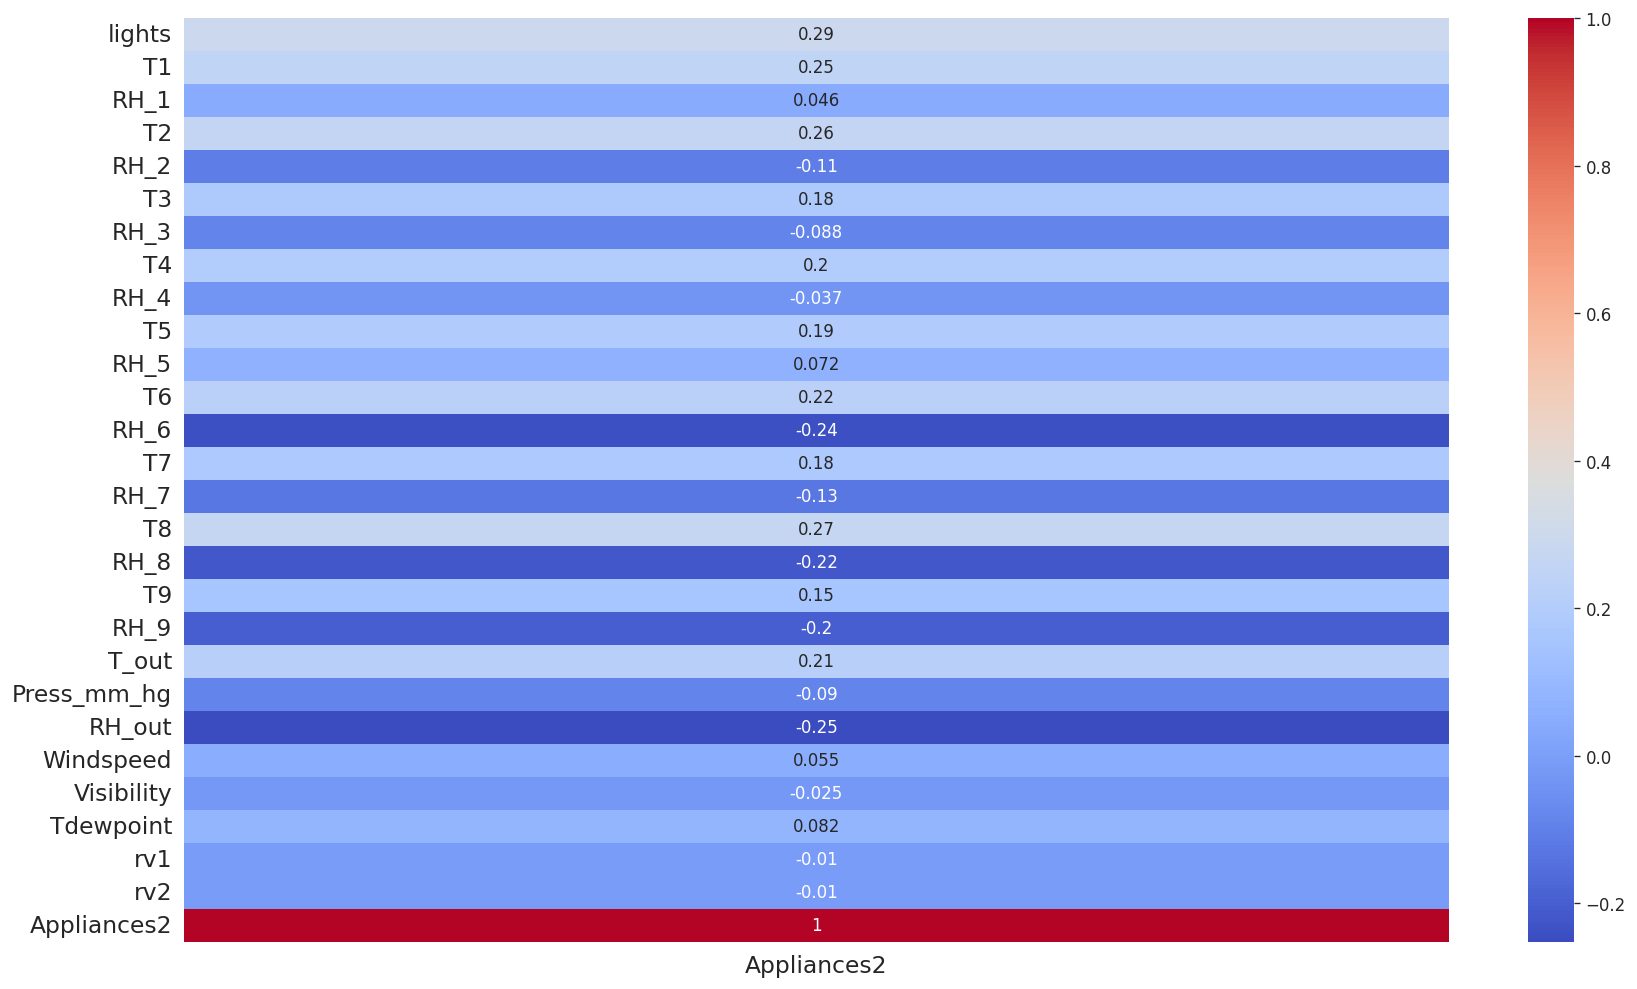

In [53]:
plt.figure(figsize = (17, 10))
sns.heatmap(app_score.to_frame(),cmap = 'coolwarm', annot = True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

# Feature Selection

In [54]:
# X = df3[['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
#        'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
#        'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
#        'Tdewpoint']]

In [55]:
X = df3[["T1", "RH_1", "RH_2", "T3", "RH_6", "RH_7", "RH_8", "RH_9", "RH_out", "T_out", "Windspeed"]]

In [56]:
y = df3['Appliances2']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, train_size = 0.7)

### Normalisation using Min Max Scaler

In [58]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Testing regression models--

1)  Linear Regression

2) Decision Tree Regression

3) Random forest Regression

4) XGBOOST

5) SVM


### 1) Linear Regression

In [59]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [60]:
linear_pred_test = lr.predict(X_test_scaled)
linear_pred_train = lr.predict(X_train_scaled)

print('Evaluation on the test dataset: ')
print("Mean Absolute Error:", round(mean_absolute_error(y_test, linear_pred_test), 2))
print("Mean Squared Error:", round(mean_squared_error(y_test, linear_pred_test), 2))
print("Root Mean Squared Error:", round(np.sqrt(mean_squared_error(y_test, linear_pred_test)), 2))
print("R-squared:", round(r2_score(y_test, linear_pred_test), 2))
print()

print('Evaluation on the train dataset: ')
print("Mean Absolute Error:", round(mean_absolute_error(y_train, linear_pred_train), 2))
print("Mean Squared Error:", round(mean_squared_error(y_train, linear_pred_train), 2))
print("Root Mean Squared Error:", round(np.sqrt(mean_squared_error(y_train, linear_pred_train)), 2))
print("R-squared:", round(r2_score(y_train, linear_pred_train), 2))

Evaluation on the test dataset: 
Mean Absolute Error: 18.81
Mean Squared Error: 637.63
Root Mean Squared Error: 25.25
R-squared: 0.24

Evaluation on the train dataset: 
Mean Absolute Error: 18.52
Mean Squared Error: 606.18
Root Mean Squared Error: 24.62
R-squared: 0.24


### 2) Decision Tree

In [61]:
from sklearn.tree import DecisionTreeRegressor

Decision_tree = DecisionTreeRegressor(max_depth = 10)
Decision_tree.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=10)

In [62]:
Dt_pred_train = Decision_tree.predict(X_train_scaled)
Dt_pred_test = Decision_tree.predict(X_test_scaled)

In [63]:
print('Evaluation on the test dataset: ')
print("Mean Absolute Error:", round(mean_absolute_error(y_test, Dt_pred_test), 2))
print("Mean Squared Error:", round(mean_squared_error(y_test, Dt_pred_test), 2))
print("Root Mean Squared Error:", round(np.sqrt(mean_squared_error(y_test, Dt_pred_test)), 2))
print("R-squared:", round(r2_score(y_test, Dt_pred_test), 2))
print()

print('Evaluation on the train dataset: ')
print("Mean Absolute Error:", round(mean_absolute_error(y_train, Dt_pred_train), 2))
print("Mean Squared Error:", round(mean_squared_error(y_train, Dt_pred_train), 2))
print("Root Mean Squared Error:", round(np.sqrt(mean_squared_error(y_train, Dt_pred_train)), 2))
print("R-squared:", round(r2_score(y_train, Dt_pred_train), 2))

Evaluation on the test dataset: 
Mean Absolute Error: 15.1
Mean Squared Error: 497.42
Root Mean Squared Error: 22.3
R-squared: 0.41

Evaluation on the train dataset: 
Mean Absolute Error: 11.94
Mean Squared Error: 295.99
Root Mean Squared Error: 17.2
R-squared: 0.63


### 3) Random forest

In [64]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=200, max_depth=12, random_state=42)
random_forest.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=12, n_estimators=200, random_state=42)

In [65]:
rf_pred_train = random_forest.predict(X_train_scaled)
rf_pred_test = random_forest.predict(X_test_scaled)

In [66]:
print('Evaluation on the test dataset: ')
print("Mean Absolute Error:", round(mean_absolute_error(y_test, rf_pred_test), 2))
print("Mean Squared Error:", round(mean_squared_error(y_test, rf_pred_test), 2))
print("Root Mean Squared Error:", round(np.sqrt(mean_squared_error(y_test, rf_pred_test)), 2))
print("R-squared:", round(r2_score(y_test, rf_pred_test), 2))
print()

print('Evaluation on the train dataset: ')
print("Mean Absolute Error:", round(mean_absolute_error(y_train, rf_pred_train), 2))
print("Mean Squared Error:", round(mean_squared_error(y_train, rf_pred_train), 2))
print("Root Mean Squared Error:", round(np.sqrt(mean_squared_error(y_train, rf_pred_train)), 2))
print("R-squared:", round(r2_score(y_train, rf_pred_train), 2))

Evaluation on the test dataset: 
Mean Absolute Error: 12.34
Mean Squared Error: 332.58
Root Mean Squared Error: 18.24
R-squared: 0.6

Evaluation on the train dataset: 
Mean Absolute Error: 8.95
Mean Squared Error: 153.57
Root Mean Squared Error: 12.39
R-squared: 0.81


### 4. XG BOOST

In [67]:
import xgboost as xgb

In [68]:
reg_model = xgb.XGBRegressor(n_estimators=50)

In [69]:
eval_data=[(X_train_scaled, y_train), (X_test_scaled, y_test)]

In [70]:
reg_model.fit(X_train_scaled, y_train,eval_set=eval_data,early_stopping_rounds=10,verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [71]:
xg_pred_test = reg_model.predict(X_test_scaled)
xg_pred_train = reg_model.predict(X_train_scaled)

In [72]:
print('Evaluation on the test dataset: ')
print("Mean Absolute Error:", round(mean_absolute_error(y_test, xg_pred_test), 2))
print("Mean Squared Error:", round(mean_squared_error(y_test, xg_pred_test), 2))
print("Root Mean Squared Error:", round(np.sqrt(mean_squared_error(y_test, xg_pred_test)), 2))
print("R-squared:", round(r2_score(y_test, xg_pred_test), 2))
print()

print('Evaluation on the train dataset: ')
print("Mean Absolute Error:", round(mean_absolute_error(y_train, xg_pred_train), 2))
print("Mean Squared Error:", round(mean_squared_error(y_train, xg_pred_train), 2))
print("Root Mean Squared Error:", round(np.sqrt(mean_squared_error(y_train, xg_pred_train)), 2))
print("R-squared:", round(r2_score(y_train, xg_pred_train), 2))

Evaluation on the test dataset: 
Mean Absolute Error: 13.08
Mean Squared Error: 363.34
Root Mean Squared Error: 19.06
R-squared: 0.57

Evaluation on the train dataset: 
Mean Absolute Error: 10.07
Mean Squared Error: 198.26
Root Mean Squared Error: 14.08
R-squared: 0.75


### 5. SVM

In [73]:
from sklearn.svm import SVR

In [74]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

In [75]:
y_rbf_train = svr_rbf.fit(X_train_scaled, y_train).predict(X_train_scaled)
y_rbf_test = svr_rbf.fit(X_train_scaled, y_train).predict(X_test_scaled)

###### RBF Kernel (SVM)

In [76]:
print('Evaluation on the test dataset: ')
print("Mean Absolute Error:", round(mean_absolute_error(y_test, y_rbf_test), 2))
print("Mean Squared Error:", round(mean_squared_error(y_test, y_rbf_test), 2))
print("Root Mean Squared Error:", round(np.sqrt(mean_squared_error(y_test, y_rbf_test)), 2))
print("R-squared:", round(r2_score(y_test, y_rbf_test), 2))
print()

print('Evaluation on the train dataset: ')
print("Mean Absolute Error:", round(mean_absolute_error(y_train, y_rbf_train), 2))
print("Mean Squared Error:", round(mean_squared_error(y_train, y_rbf_train), 2))
print("Root Mean Squared Error:", round(np.sqrt(mean_squared_error(y_train, y_rbf_train)), 2))
print("R-squared:", round(r2_score(y_train, y_rbf_train), 2))

Evaluation on the test dataset: 
Mean Absolute Error: 17.22
Mean Squared Error: 605.79
Root Mean Squared Error: 24.61
R-squared: 0.28

Evaluation on the train dataset: 
Mean Absolute Error: 16.86
Mean Squared Error: 565.52
Root Mean Squared Error: 23.78
R-squared: 0.29


In [77]:
# y_lin_train = svr_lin.fit(X_train_scaled, y_train).predict(X_train_scaled)
# y_lin_test = svr_lin.fit(X_train_scaled, y_train).predict(X_test_scaled)

In [78]:
# print('Evaluation on the test dataset: ')
# print("Mean Absolute Error:", round(mean_absolute_error(y_test, y_lin_test), 2))
# print("Mean Squared Error:", round(mean_squared_error(y_test, y_lin_test), 2))
# print("Root Mean Squared Error:", round(np.sqrt(mean_squared_error(y_test, y_lin_test)), 2))
# print("R-squared:", round(r2_score(y_test, y_lin_test), 2))
# print()

# print('Evaluation on the train dataset: ')
# print("Mean Absolute Error:", round(mean_absolute_error(y_train, y_lin_train), 2))
# print("Mean Squared Error:", round(mean_squared_error(y_train, y_lin_train), 2))
# print("Root Mean Squared Error:", round(np.sqrt(mean_squared_error(y_train, y_lin_train)), 2))
# print("R-squared:", round(r2_score(y_train, y_lin_train), 2))

In [79]:
# y_poly_train = svr_poly.fit(X_train_scaled, y_train).predict(X_train_scaled)
# y_poly_test = svr_poly.fit(X_train_scaled, y_train).predict(X_test_scaled)

In [80]:
# print('Evaluation on the test dataset: ')
# print("Mean Absolute Error:", round(mean_absolute_error(y_test, y_poly_test), 2))
# print("Mean Squared Error:", round(mean_squared_error(y_test, y_poly_test), 2))
# print("Root Mean Squared Error:", round(np.sqrt(mean_squared_error(y_test, y_poly_test)), 2))
# print("R-squared:", round(r2_score(y_test, y_poly_test), 2))
# print()

# print('Evaluation on the train dataset: ')
# print("Mean Absolute Error:", round(mean_absolute_error(y_train, y_poly_train), 2))
# print("Mean Squared Error:", round(mean_squared_error(y_train, y_poly_train), 2))
# print("Root Mean Squared Error:", round(np.sqrt(mean_squared_error(y_train, y_poly_train)), 2))
# print("R-squared:", round(r2_score(y_train, y_poly_train), 2))

As per observation, RBF giving better results.

### Random forest is giving best results in terms of MSE, let's calculate importance of features from this model-

In [81]:
# Calculate feature importances
feature_importances = random_forest.feature_importances_


In [82]:
feature_importances

array([0.11361707, 0.12404319, 0.06011756, 0.06970047, 0.12082358,
       0.07539339, 0.11571474, 0.1134625 , 0.09828771, 0.06384137,
       0.04499843])

In [83]:
# feature_names = df3[['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
#        'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
#        'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
#        'Tdewpoint']]

In [84]:
features_names = df3[["T1", "RH_1", "RH_2", "T3", "RH_6", "RH_7", "RH_8", "RH_9", "RH_out", "T_out", "Windspeed"]]

In [85]:
feature_names = features_names.columns

In [86]:
# Convert to a pandas DataFrame for easy plotting
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,  # Replace with your actual feature names
    'Importance': feature_importances
})

In [87]:
# Sort by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)


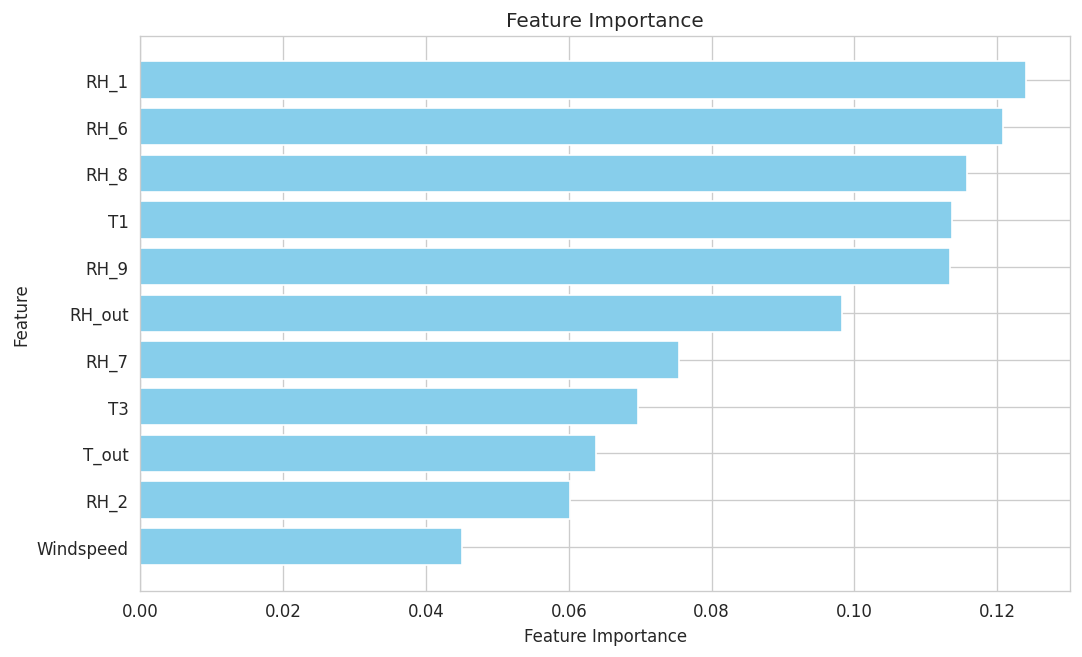

In [88]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

### Ensembling of the models

Linear Regression + Random Forest

In [89]:
Ensembled_lin_rf = (linear_pred_test + rf_pred_test)/2

In [90]:
print('Evaluation on the test dataset: ')
print("Mean Absolute Error:", round(mean_absolute_error(y_test, rf_pred_test), 2))
print("Mean Squared Error:", round(mean_squared_error(y_test, rf_pred_test), 2))
print("Root Mean Squared Error:", round(np.sqrt(mean_squared_error(y_test, rf_pred_test)), 2))
print("R-squared:", round(r2_score(y_test, rf_pred_test), 2))
print()

Evaluation on the test dataset: 
Mean Absolute Error: 12.34
Mean Squared Error: 332.58
Root Mean Squared Error: 18.24
R-squared: 0.6



Linear Regression + XG-BOOST

In [91]:
Ensembled_lin_xg = (linear_pred_test + xg_pred_test)/2

In [92]:
print('Evaluation on the test dataset: ')
print("Mean Absolute Error:", round(mean_absolute_error(y_test, Ensembled_lin_xg), 2))
print("Mean Squared Error:", round(mean_squared_error(y_test, Ensembled_lin_xg), 2))
print("Root Mean Squared Error:", round(np.sqrt(mean_squared_error(y_test, Ensembled_lin_xg)), 2))
print("R-squared:", round(r2_score(y_test, Ensembled_lin_xg), 2))
print()

Evaluation on the test dataset: 
Mean Absolute Error: 15.03
Mean Squared Error: 441.43
Root Mean Squared Error: 21.01
R-squared: 0.47



Linear Regression + SVM

In [93]:
Ensembled_lin_svm = (linear_pred_test + y_rbf_test)/2

In [94]:
print('Evaluation on the test dataset: ')
print("Mean Absolute Error:", round(mean_absolute_error(y_test, Ensembled_lin_svm), 2))
print("Mean Squared Error:", round(mean_squared_error(y_test, Ensembled_lin_svm), 2))
print("Root Mean Squared Error:", round(np.sqrt(mean_squared_error(y_test, Ensembled_lin_svm)), 2))
print("R-squared:", round(r2_score(y_test, Ensembled_lin_svm), 2))
print()

Evaluation on the test dataset: 
Mean Absolute Error: 17.79
Mean Squared Error: 608.94
Root Mean Squared Error: 24.68
R-squared: 0.27



Linear Regression + Decision Tree

In [95]:
Ensembled_lin_dt = (linear_pred_test + Dt_pred_test)/2

In [96]:
print('Evaluation on the test dataset: ')
print("Mean Absolute Error:", round(mean_absolute_error(y_test, Ensembled_lin_dt), 2))
print("Mean Squared Error:", round(mean_squared_error(y_test, Ensembled_lin_dt), 2))
print("Root Mean Squared Error:", round(np.sqrt(mean_squared_error(y_test, Ensembled_lin_dt)), 2))
print("R-squared:", round(r2_score(y_test, Ensembled_lin_dt), 2))
print()

Evaluation on the test dataset: 
Mean Absolute Error: 15.74
Mean Squared Error: 488.23
Root Mean Squared Error: 22.1
R-squared: 0.42



## Applying Models without Detrending on the results of Linear Regression

#### GARCH Model

In [97]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 13.3 MB/s eta 0:00:00


In [98]:
from arch import arch_model
garch_model_wd = arch_model(linear_pred_train, vol='Garch', p=1, q=1)
garch_model_fit_wd = garch_model_wd.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 51027.67132965391
Iteration:      2,   Func. Count:     15,   Neg. LLF: 50845.59305870672
Iteration:      3,   Func. Count:     23,   Neg. LLF: 49923.409267990544
Iteration:      4,   Func. Count:     30,   Neg. LLF: 49923.14998394401
Iteration:      5,   Func. Count:     35,   Neg. LLF: 49923.14981249561
Iteration:      6,   Func. Count:     40,   Neg. LLF: 49923.14877617937
Iteration:      7,   Func. Count:     45,   Neg. LLF: 49923.144420137396
Iteration:      8,   Func. Count:     50,   Neg. LLF: 49923.12186129748
Iteration:      9,   Func. Count:     55,   Neg. LLF: 49923.044183689795
Iteration:     10,   Func. Count:     60,   Neg. LLF: 49923.054777269914
Iteration:     11,   Func. Count:     66,   Neg. LLF: 49922.95333666916
Iteration:     12,   Func. Count:     71,   Neg. LLF: 49923.01131077631
Iteration:     13,   Func. Count:     77,   Neg. LLF: 49922.95192743938
Optimization terminated successfully    (Exit mode 0)
      

In [99]:
predictions_wd = garch_model_fit_wd.forecast(horizon=len(y))

In [100]:
# Access the forecasted values
forecasted_values_wd = predictions_wd.mean.iloc[-len(y):]

# Print the forecasted values
print(forecasted_values_wd)



         h.00001    h.00002    h.00003    h.00004    h.00005    h.00006  \
12316  67.225048  67.225048  67.225048  67.225048  67.225048  67.225048   

         h.00007    h.00008    h.00009    h.00010  ...    h.17588    h.17589  \
12316  67.225048  67.225048  67.225048  67.225048  ...  67.225048  67.225048   

         h.17590    h.17591    h.17592    h.17593    h.17594    h.17595  \
12316  67.225048  67.225048  67.225048  67.225048  67.225048  67.225048   

         h.17596    h.17597  
12316  67.225048  67.225048  

[1 rows x 17597 columns]


In [101]:
forecasted_values_wd = forecasted_values_wd.values.reshape(-1,1)

In [102]:
# Calculate evaluation metrics
mse = mean_squared_error(y, forecasted_values_wd)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, forecasted_values_wd)
r2 = r2_score(y, forecasted_values_wd)

print('Mean Squarred error: ', mse)
print('Root Mean Squarred error: ', rmse)
print('Mean Absolute error: ', mae)
print('R2 score: ', r2)


Mean Squarred error:  811.0929660770663
Root Mean Squarred error:  28.479693925270094
Mean Absolute error:  22.436930313810358
R2 score:  -2.884818477433271e-07


In [103]:
p,d,q = (1, 0, 1)

# Fit the ARIMA model to the detrended data
model = ARIMA(linear_pred_train, order=(p, d, q))
model_fit = model.fit()

In [104]:
# Obtain the fitted values and residuals
fitted_values = model_fit.fittedvalues
residuals = model_fit.resid

fitted_values = model_fit.forecast(steps=len(y))
print(fitted_values.shape)

flatten_test = y.values.reshape(-1)
# print(flatten_test)
print(flatten_test.shape)

(17597,)
(17597,)


In [105]:
# Calculate evaluation metrics
mse = mean_squared_error(flatten_test, fitted_values)
rmse = np.sqrt(mse)
mae = mean_absolute_error(flatten_test, fitted_values)
r2 = r2_score(flatten_test, fitted_values)

print('Mean Squarred error: ', mse)
print('Root Mean Squarred error: ', rmse)
print('Mean Absolute error: ', mae)
print('R2 score: ', r2)

Mean Squarred error:  811.0927305968858
Root Mean Squarred error:  28.47968979109298
Mean Absolute error:  22.437575831174417
R2 score:  1.8427616099714328e-09


### FNN on Linear Regression Results

In [106]:
from tensorflow import keras

In [107]:
# Prepare the data
X = linear_pred_train.reshape(-1, 1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
# Adjust the length of y to match X
y = y[-len(X):]

In [108]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [109]:
# Build the FNN model
model_fnn_wd = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model_fnn_wd.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model_fnn_wd.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test data
y_pred_fnn_wd = model_fnn_wd.predict(X_test)

Epoch 1/100
247/247 [==============================] - 3s 9ms/step - loss: 4581.1025 - val_loss: 2419.5276
Epoch 2/100
247/247 [==============================] - 2s 6ms/step - loss: 1135.0309 - val_loss: 736.4636
Epoch 3/100
247/247 [==============================] - 2s 7ms/step - loss: 845.3374 - val_loss: 729.8937
Epoch 4/100
247/247 [==============================] - 1s 5ms/step - loss: 836.2451 - val_loss: 719.6562
Epoch 5/100
247/247 [==============================] - 1s 5ms/step - loss: 827.0469 - val_loss: 707.7164
Epoch 6/100
247/247 [==============================] - 1s 4ms/step - loss: 818.2731 - val_loss: 706.0955
Epoch 7/100
247/247 [==============================] - 1s 4ms/step - loss: 811.7257 - val_loss: 694.2428
Epoch 8/100
247/247 [==============================] - 1s 4ms/step - loss: 806.2616 - val_loss: 690.2489
Epoch 9/100
247/247 [==============================] - 1s 4ms/step - loss: 801.6400 - val_loss: 682.4695
Epoch 10/100
247/247 [==============================

In [110]:
mse = mean_squared_error(y_test, y_pred_fnn_wd)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_fnn_wd)
r2 = r2_score(y_test, y_pred_fnn_wd)


# Calculate Mean Squared Error on the test set
print(f"Mean Squared Error on Test Set: {mse}")
print(f"Root Mean Squared Error on Test Set: {rmse}")
print(f"Mean Absolute Error on Test Set: {mae}")
print(f"R2 score : {r2}")


Mean Squared Error on Test Set: 723.2555078730018
Root Mean Squared Error on Test Set: 26.893410119823066
Mean Absolute Error on Test Set: 20.12341685418959
R2 score : -0.030242603195474116


### Apply LSTM Without detrending

In [111]:
#  Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [112]:
# Train the LSTM model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
308/308 [==============================] - 3s 3ms/step - loss: 5107.0728
Epoch 2/100
308/308 [==============================] - 1s 3ms/step - loss: 3287.9873
Epoch 3/100
308/308 [==============================] - 1s 3ms/step - loss: 1685.1932
Epoch 4/100
308/308 [==============================] - 1s 3ms/step - loss: 1019.7000
Epoch 5/100
308/308 [==============================] - 2s 6ms/step - loss: 827.6469
Epoch 6/100
308/308 [==============================] - 2s 6ms/step - loss: 788.1872
Epoch 7/100
308/308 [==============================] - 1s 4ms/step - loss: 782.7820
Epoch 8/100
308/308 [==============================] - 1s 4ms/step - loss: 781.8911
Epoch 9/100
308/308 [==============================] - 1s 4ms/step - loss: 781.5151
Epoch 10/100
308/308 [==============================] - 1s 5ms/step - loss: 781.0227
Epoch 11/100
308/308 [==============================] - 2s 6ms/step - loss: 780.4331
Epoch 12/100
308/308 [==============================] - 1s 5ms/step - 

In [113]:
# Evaluate the LSTM model
LSTM_pred = model.predict(X_test)
# y_test = y_test.reshape(-1)  # Reshape y_test to be 1-dimensional

77/77 [==============================] - 1s 2ms/step


In [114]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, LSTM_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, LSTM_pred)
r2 = r2_score(y_test, LSTM_pred)

print('Mean Squarred error: ', mse)
print('Root Mean Squarred error: ', rmse)
print('Mean Absolute error: ', mae)
print('R2 score: ', r2)

Mean Squarred error:  719.871596900383
Root Mean Squarred error:  26.830422972819175
Mean Absolute error:  20.159451868626977
R2 score:  -0.025422385151556037


### RNN Without detrend

In [115]:
# Reshape the input data for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, 1)
X_test = X_test.reshape(X_test.shape[0], 1, 1)

In [116]:
#import libraries and packages:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

#Initialize RNN:
regressor = Sequential()

#Adding the first RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 150, activation='relu', return_sequences=True, input_shape= (X_train.shape[1],1)))
regressor.add(Dropout(0.8))

#Adding the second RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 150, activation='relu', return_sequences=True))
regressor.add(Dropout(0.8))

#Adding the third RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 150, activation='relu', return_sequences=True))
regressor.add(Dropout(0.8))

#Adding the fourth RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.8))

#Adding the output layer
regressor.add(Dense(units = 1))

#Compile the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

#Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
154/154 [==============================] - 6s 7ms/step - loss: 4197.8564
Epoch 2/100
154/154 [==============================] - 1s 7ms/step - loss: 3104.3933
Epoch 3/100
154/154 [==============================] - 1s 7ms/step - loss: 2499.1721
Epoch 4/100
154/154 [==============================] - 1s 7ms/step - loss: 2076.1104
Epoch 5/100
154/154 [==============================] - 1s 7ms/step - loss: 1741.6080
Epoch 6/100
154/154 [==============================] - 1s 7ms/step - loss: 1521.6140
Epoch 7/100
154/154 [==============================] - 1s 7ms/step - loss: 1378.2396
Epoch 8/100
154/154 [==============================] - 1s 7ms/step - loss: 1247.1035
Epoch 9/100
154/154 [==============================] - 1s 7ms/step - loss: 1202.5570
Epoch 10/100
154/154 [==============================] - 1s 9ms/step - loss: 1169.9132
Epoch 11/100
154/154 [==============================] - 2s 15ms/step - loss: 1131.6151
Epoch 12/100
154/154 [==============================] - 2s 10m

In [117]:
rnn_pred = regressor.predict(X_test)

77/77 [==============================] - 1s 2ms/step


In [118]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, rnn_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, rnn_pred)
r2 = r2_score(y_test, rnn_pred)

print('Mean Squarred error: ', mse)
print('Root Mean Squarred error: ', rmse)
print('Mean Absolute error: ', mae)
print('R2 score: ', r2)

Mean Squarred error:  764.5757252944712
Root Mean Squarred error:  27.65096246596981
Mean Absolute error:  19.764713980934836
R2 score:  -0.08910126088629466


### Applying models after detrending

In [119]:
# Convert y_pred to a Pandas Series
y_pred_series = pd.Series(linear_pred_test)

# Define the window size for the moving average
window_size = 10

# Calculate the moving average and subtract it from y_pred
detrended_ma = y_pred_series - y_pred_series.rolling(window=window_size).mean()

In [120]:
#  Handle missing values (NaN) in detrended_ma
detrended_ma = detrended_ma.fillna(method='ffill')
# Convert detrended_ma to numpy array
detrended_ma = detrended_ma.to_numpy()

# Remove any remaining NaN values, if present
detrended_ma = detrended_ma[~np.isnan(detrended_ma)]

In [121]:
# Prepare the data
X_new = detrended_ma.reshape(-1, 1)  # Reshape the detrended data
scaler = MinMaxScaler()  # Normalize the data
X_new = scaler.fit_transform(X)
# Adjust the length of y to match X
y_new = y

In [122]:
# Split the data into training and test sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, shuffle=False)

#### 1. FNN Results after detrending

In [123]:
# Build the FNN model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_new.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_new, y_new,epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test data
y_pred = model.predict(X_test)

Epoch 1/100
308/308 [==============================] - 1s 2ms/step - loss: 3857.8718 - val_loss: 1177.8264
Epoch 2/100
308/308 [==============================] - 1s 2ms/step - loss: 847.9357 - val_loss: 768.7602
Epoch 3/100
308/308 [==============================] - 1s 2ms/step - loss: 815.2938 - val_loss: 748.0109
Epoch 4/100
308/308 [==============================] - 1s 2ms/step - loss: 800.7823 - val_loss: 742.1588
Epoch 5/100
308/308 [==============================] - 1s 2ms/step - loss: 789.5222 - val_loss: 729.5289
Epoch 6/100
308/308 [==============================] - 1s 2ms/step - loss: 781.0359 - val_loss: 719.6793
Epoch 7/100
308/308 [==============================] - 1s 2ms/step - loss: 775.9555 - val_loss: 714.9317
Epoch 8/100
308/308 [==============================] - 1s 2ms/step - loss: 773.5950 - val_loss: 732.7745
Epoch 9/100
308/308 [==============================] - 1s 3ms/step - loss: 771.7448 - val_loss: 735.5792
Epoch 10/100
308/308 [==============================]

In [124]:
y_pred_train = model.predict(X_test)

77/77 [==============================] - 0s 1ms/step


In [125]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Calculate Mean Squared Error on the test set
print(f"Mean Squared Error on Test Set: {mse}")
print(f"Root Mean Squared Error on Test Set: {rmse}")
print(f"Mean Absolute Error on Test Set: {mae}")
print(f"R2 score : {r2}")


Mean Squared Error on Test Set: 707.6857918953616
Root Mean Squared Error on Test Set: 26.602364404228464
Mean Absolute Error on Test Set: 20.38043585690585
R2 score : -0.008064293393186484


#### 2. LSTM Model after detrending

In [126]:
# Prepare the data
X_new = detrended_ma.reshape(-1, 1)  # Reshape the detrended data
scaler = MinMaxScaler()  # Normalize the data
X_new = scaler.fit_transform(X)

# Adjust the length of y to match X
y = y[-len(X):]


In [127]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, shuffle=False)

In [128]:
#  Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [129]:
# Train the LSTM model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
308/308 [==============================] - 3s 3ms/step - loss: 5092.8838
Epoch 2/100
308/308 [==============================] - 1s 3ms/step - loss: 3270.7495
Epoch 3/100
308/308 [==============================] - 1s 4ms/step - loss: 1675.8645
Epoch 4/100
308/308 [==============================] - 1s 4ms/step - loss: 1018.8192
Epoch 5/100
308/308 [==============================] - 1s 4ms/step - loss: 828.0282
Epoch 6/100
308/308 [==============================] - 1s 3ms/step - loss: 788.5516
Epoch 7/100
308/308 [==============================] - 1s 3ms/step - loss: 782.9667
Epoch 8/100
308/308 [==============================] - 1s 3ms/step - loss: 782.0580
Epoch 9/100
308/308 [==============================] - 1s 3ms/step - loss: 781.5657
Epoch 10/100
308/308 [==============================] - 1s 3ms/step - loss: 781.0351
Epoch 11/100
308/308 [==============================] - 1s 3ms/step - loss: 780.5703
Epoch 12/100
308/308 [==============================] - 1s 3ms/step - 

In [130]:
# Evaluate the LSTM model
LSTM_pred = model.predict(X_test)
y_test = y_test.values.reshape(-1)


77/77 [==============================] - 1s 2ms/step


In [131]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, LSTM_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, LSTM_pred)
r2 = r2_score(y_test, LSTM_pred)

print('Mean Squarred error: ', mse)
print('Root Mean Squarred error: ', rmse)
print('Mean Absolute error: ', mae)
print('R2 score: ', r2)

Mean Squarred error:  715.2198858863651
Root Mean Squarred error:  26.743595231127117
Mean Absolute error:  20.22278358409931
R2 score:  -0.018796247068641803


#### 3. RNN Model after detrending

In [132]:
# Prepare the data
X = detrended_ma.reshape(-1, 1)
y = y[-len(X):]

In [133]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [134]:
# Reshape the input data for LSTM
X_train = X_train.reshape(X_train.shape[0], 1, 1)
X_test = X_test.reshape(X_test.shape[0], 1, 1)


In [135]:
model = Sequential()
model.add(SimpleRNN((5), batch_input_shape=(None, 1,1), return_sequences = False, activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [136]:
# Train the RNN model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
132/132 [==============================] - 1s 2ms/step - loss: 5951.2617
Epoch 2/100
132/132 [==============================] - 0s 2ms/step - loss: 5508.0117
Epoch 3/100
132/132 [==============================] - 0s 2ms/step - loss: 5018.5571
Epoch 4/100
132/132 [==============================] - 0s 2ms/step - loss: 4482.1670
Epoch 5/100
132/132 [==============================] - 0s 2ms/step - loss: 3955.4390
Epoch 6/100
132/132 [==============================] - 0s 2ms/step - loss: 3502.9370
Epoch 7/100
132/132 [==============================] - 0s 2ms/step - loss: 3141.6147
Epoch 8/100
132/132 [==============================] - 0s 2ms/step - loss: 2849.8374
Epoch 9/100
132/132 [==============================] - 0s 2ms/step - loss: 2612.6743
Epoch 10/100
132/132 [==============================] - 0s 2ms/step - loss: 2422.6436
Epoch 11/100
132/132 [==============================] - 0s 2ms/step - loss: 2278.6956
Epoch 12/100
132/132 [==============================] - 0s 2ms/

In [137]:
# Evaluate the RNN model
rnn_pred = model.predict(X_test)
# y_pred = y_pred.flatten()  # Flatten the predictions to match the shape of y_test
y_test = y_test.values.reshape(-1)  # Reshape y_test to be 1-dimensional
# Adjust the length of y_test
# y_pred = y_pred[1:]

33/33 [==============================] - 0s 2ms/step


In [138]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, rnn_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, rnn_pred)
r2 = r2_score(y_test, rnn_pred)

print('Mean Squarred error: ', mse)
print('Root Mean Squarred error: ', rmse)
print('Mean Absolute error: ', mae)
print('R2 score: ', r2)

Mean Squarred error:  788.0108727001572
Root Mean Squarred error:  28.071531356521273
Mean Absolute error:  21.171956037910064
R2 score:  -0.023921025956188835


#### ARIMA Model after detrending

In [139]:
p,d,q = (3, 0, 2)

# Fit the ARIMA model to the detrended data
model = ARIMA(detrended_ma, order=(p, d, q))
model_fit = model.fit()

# Obtain the fitted values and residuals
fitted_values = model_fit.fittedvalues
residuals = model_fit.resid

In [140]:
fitted_values = model_fit.forecast(steps=len(y))
print(fitted_values.shape)

(5271,)


In [141]:
flatten_test = y.values.reshape(-1)
# print(flatten_test)
print(flatten_test.shape)

(5271,)


In [142]:


# Calculate evaluation metrics
mse = mean_squared_error(flatten_test, fitted_values)
rmse = np.sqrt(mse)
mae = mean_absolute_error(flatten_test, fitted_values)
r2 = r2_score(flatten_test, fitted_values)

print('Mean Squarred error: ', mse)
print('Root Mean Squarred error: ', rmse)
print('Mean Absolute error: ', mae)
print('R2 score: ', r2)

Mean Squarred error:  5700.417592028911
Root Mean Squarred error:  75.50110987282844
Mean Absolute error:  70.68658027992052
R2 score:  -7.099083211616396


### GARCH Model after detrending

In [143]:
# Define the GARCH model with desired parameters
from arch import arch_model

garch_model = arch_model(detrended_ma, mean='constant', vol='GARCH', p=1, q=1)

In [144]:
# Fit the model to the detrended data
garch_fit = garch_model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 28865.682070461968
Iteration:      2,   Func. Count:     14,   Neg. LLF: 668328.9445250928
Iteration:      3,   Func. Count:     23,   Neg. LLF: 21055.146715302333
Iteration:      4,   Func. Count:     29,   Neg. LLF: 21139.983361157152
Iteration:      5,   Func. Count:     37,   Neg. LLF: 21051.17251552592
Iteration:      6,   Func. Count:     42,   Neg. LLF: 21051.168531686006
Iteration:      7,   Func. Count:     47,   Neg. LLF: 21051.16827363579
Iteration:      8,   Func. Count:     52,   Neg. LLF: 21051.168268868787
Iteration:      9,   Func. Count:     56,   Neg. LLF: 21051.16826886046
Optimization terminated successfully    (Exit mode 0)
            Current function value: 21051.168268868787
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9


In [145]:
# Print the GARCH model summary
print(garch_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -21051.2
Distribution:                  Normal   AIC:                           42110.3
Method:            Maximum Likelihood   BIC:                           42136.6
                                        No. Observations:                 5271
Date:                Mon, Jun 03 2024   Df Residuals:                     5270
Time:                        18:59:24   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0300      0.180      0.167      0.868 [ -0.323,  0.38

In [146]:
predictions = garch_fit.forecast(horizon=len(y))


In [147]:
# Access the forecasted values
forecasted_values = predictions.mean.iloc[-len(y):]

# Print the forecasted values
print(forecasted_values)



        h.0001    h.0002    h.0003    h.0004    h.0005    h.0006    h.0007  \
5270  0.030026  0.030026  0.030026  0.030026  0.030026  0.030026  0.030026   

        h.0008    h.0009    h.0010  ...    h.5262    h.5263    h.5264  \
5270  0.030026  0.030026  0.030026  ...  0.030026  0.030026  0.030026   

        h.5265    h.5266    h.5267    h.5268    h.5269    h.5270    h.5271  
5270  0.030026  0.030026  0.030026  0.030026  0.030026  0.030026  0.030026  

[1 rows x 5271 columns]


In [148]:
# Get forecast results
predictions = garch_fit.forecast(horizon=len(y))

# Extract forecasted values for all horizons
forecasted_values = predictions.mean.iloc[-1]

# Print all forecasted values
print(forecasted_values)



h.0001    0.030026
h.0002    0.030026
h.0003    0.030026
h.0004    0.030026
h.0005    0.030026
            ...   
h.5267    0.030026
h.5268    0.030026
h.5269    0.030026
h.5270    0.030026
h.5271    0.030026
Name: 5270, Length: 5271, dtype: float64


In [149]:
# Calculate evaluation metrics
mse = mean_squared_error(y, forecasted_values)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, forecasted_values)
r2 = r2_score(y, forecasted_values)

print('Mean Squarred error: ', mse)
print('Root Mean Squarred error: ', rmse)
print('Mean Absolute error: ', mae)
print('R2 score: ', r2)

Mean Squarred error:  5696.211406672909
Root Mean Squarred error:  75.47324960986448
Mean Absolute error:  70.65675116874007
R2 score:  -7.093107115189817


In [150]:
# Mean Squarred error:  6353.633359830984
# Root Mean Squarred error:  79.70968171954385
# Mean Absolute error:  74.31765472632343
# R2 score:  -6.650242831372733